# Recell - Used Device Price Prediction

## Importing necessary libraries

In [185]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [186]:
# loading data
data = pd.read_csv("used_device_data.csv")

In [187]:
data

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


## Data Overview

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Displaying the first few rows of the dataset

In [188]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


- A high percentage of devices seem to be running on Android.
- There are devices that have been used for nearly a year available for sale

### Checking the shape of the dataset

In [189]:
data.shape

(3454, 15)

* There are 3454 rows and 15 columns in the data

### Checking the data types of the columns for the dataset

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* There are 11 numeric (*float* and *int* type) and 4 string (*object* type) columns in the data
* The target variable is the normalized price of a used device, which is of *float* type

### Statistical summary of the dataset

In [191]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


- There are 33 brands in the data and a category *Others* too.
- Android is the most common OS for the used devices.
- The weight ranges from 69g to 855g.
    - This does not seem incorrect as the data contains feature phones and tablets too.
- There are a few unusually low values for the internal memory and RAM of used devices, but those are likely due to the presence of feature phones in the data.
- The average value of the normalized price of a used device is approx. 4.4 euros.

### Checking for duplicate values

In [192]:
data.duplicated().sum()

0

* There are no duplicate values in the data

### Checking for missing values

In [193]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

* There are missing values in many columns.

In [194]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

## Exploratory Data Analysis

### Univariate Analysis

In [195]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=50):
    """ 
    Boxplot and histogram combined
    
    data : dataframe
    feature : dataframe column
    figsize : size of figure
    ked : kdeplot boolean
    bins : number of bins
    """

    figs, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # Share x-axis
        figsize=figsize,
        dpi=100,
        gridspec_kw={"height_ratios": (0.25, 0.75)}  # Heights of the axes proportions
    )

    sns.boxplot(
        data=data,
        width=0.4,
        x=feature,
        ax=ax_box,
        showmeans=True,  # Show the arithmetic mean,
        color='red'
    )

    sns.histplot(
        data=data,
        x=feature,
        ax=ax_hist,
        kde=kde,  # kde plot
        bins=bins
    )

    # Add a line for the mean.
    ax_hist.axvline(
        data[feature].mean(),
        color='green',
        linestyle='--'
    )

    # Add a line for the median.
    ax_hist.axvline(
        data[feature].median(),
        color='black',
        linestyle='-'
    )

In [196]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    
    data : dataframe
    feature : dataframe column
    perc : True for percentage, False for count
    n : how many categories to show
    """

    total = len(data[feature])
    count = data[feature].nunique()

    if n is None:
        plt.figure(figsize=(count + 2, 6), dpi=100)
    else:
        plt.figure(figsize=(n + 2, 6), dpi=100)

    ax = sns.countplot(data=data, x=feature,
                       palette='Paired',
                       order=data[feature].value_counts().index[:n]
                       )

    for p in ax.patches:
        if perc == True:
            lable = f"{p.get_height() / total * 100:.2f}%\n"
        else:
            lable = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(lable, (x, y), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.xlabel(feature, fontsize=14, weight='bold')
    plt.ylabel('Count', fontsize=14, weight='bold')

    plt.show()

**normalized_used_price**

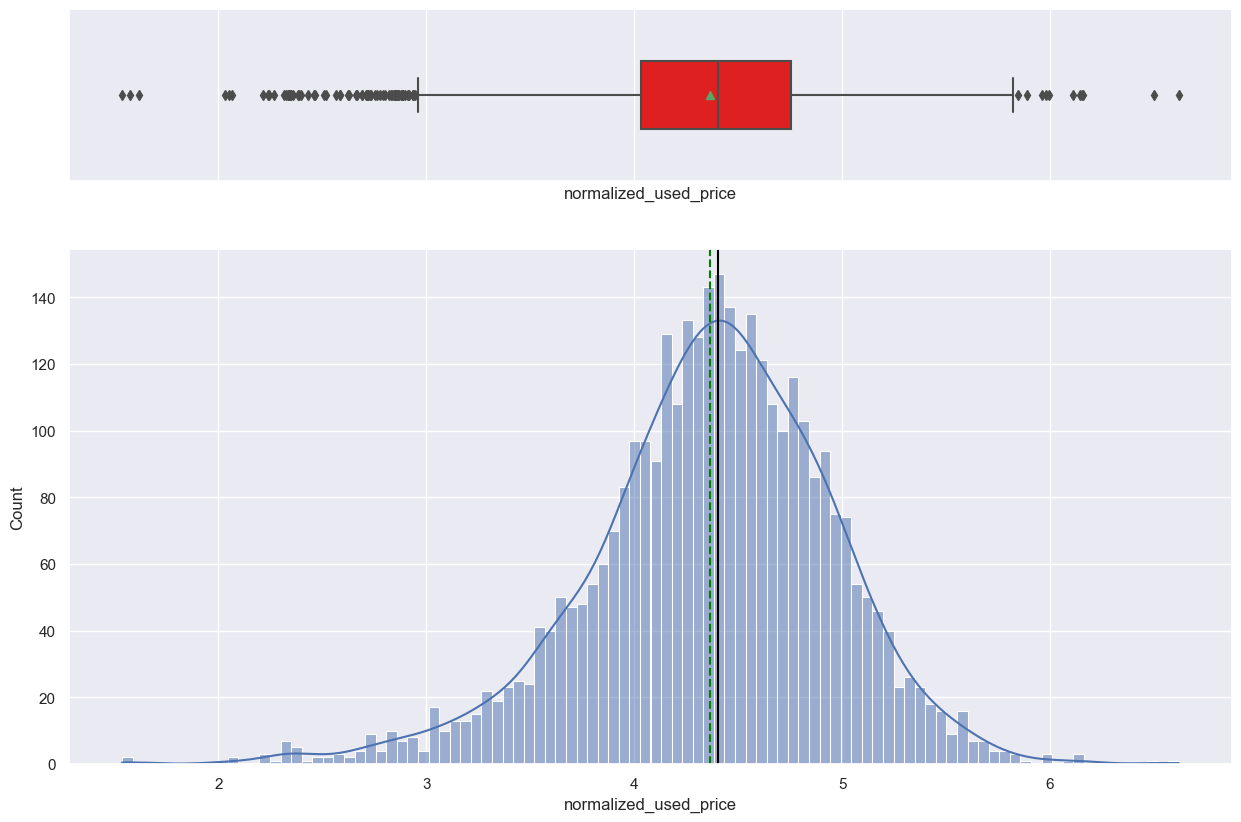

In [197]:
histogram_boxplot(df, "normalized_used_price", bins=100, kde=True)

- The normalized used device prices are almost normally distributed.

**normalized_new_price**

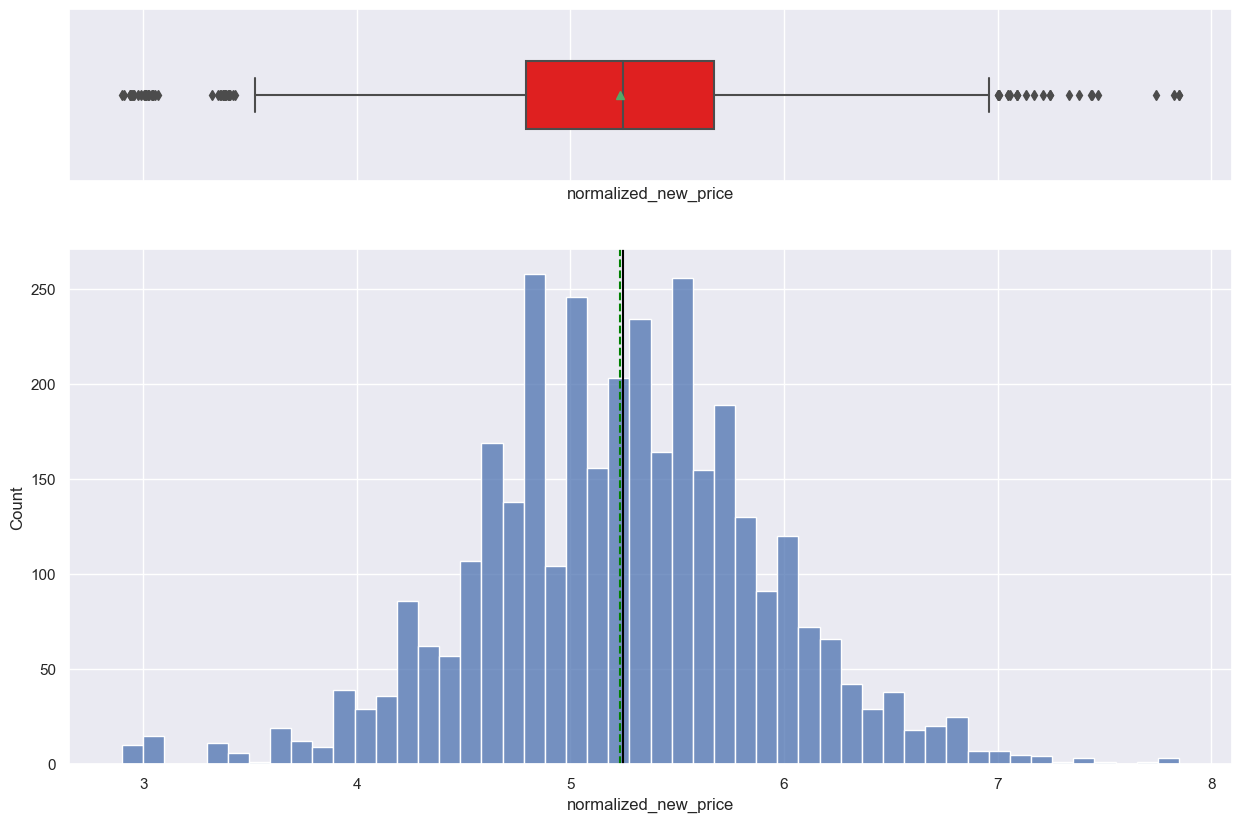

In [198]:
histogram_boxplot(df, "normalized_new_price", bins=50)

- The normalized prices of new device models are almost normally distributed.

**screen_size**

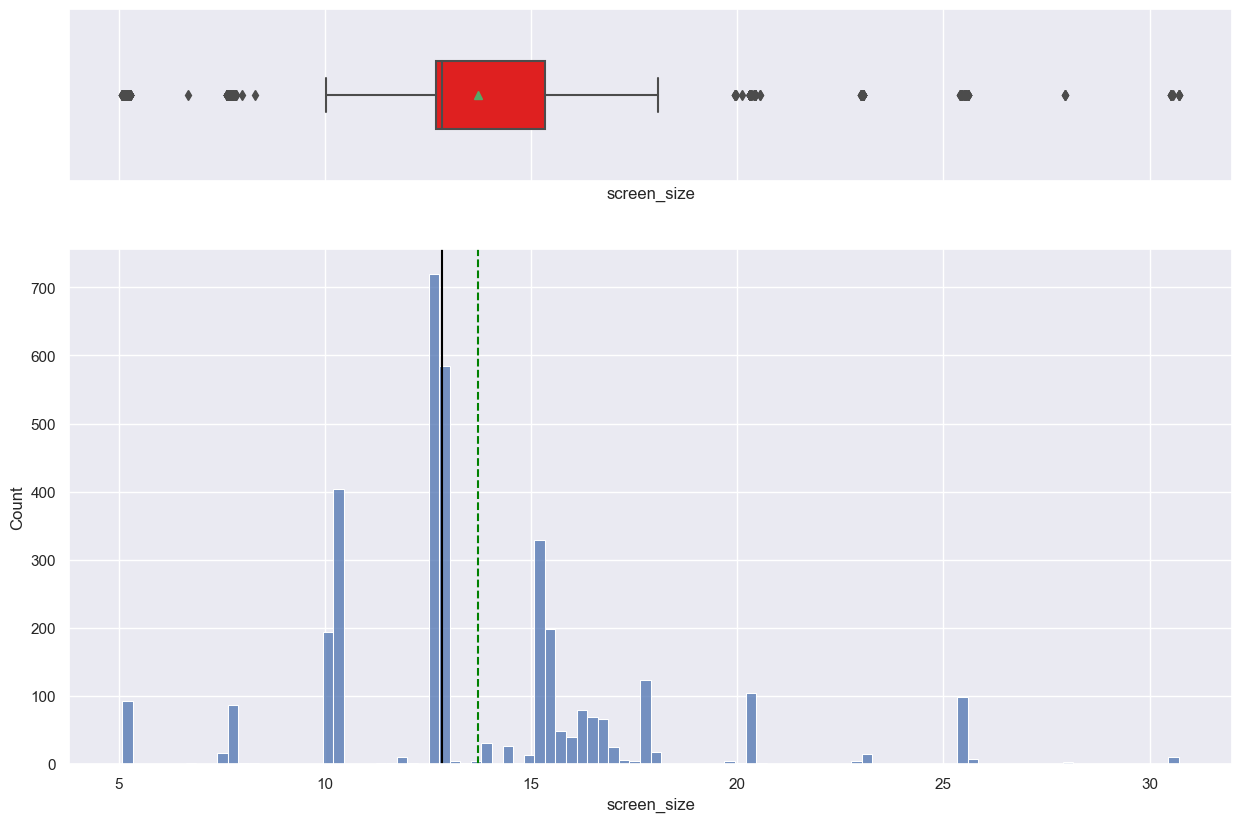

In [199]:
histogram_boxplot(df, "screen_size", bins=100)

- Around 50% of the devices have a screen larger than 13cm.

**main_camera_mp**

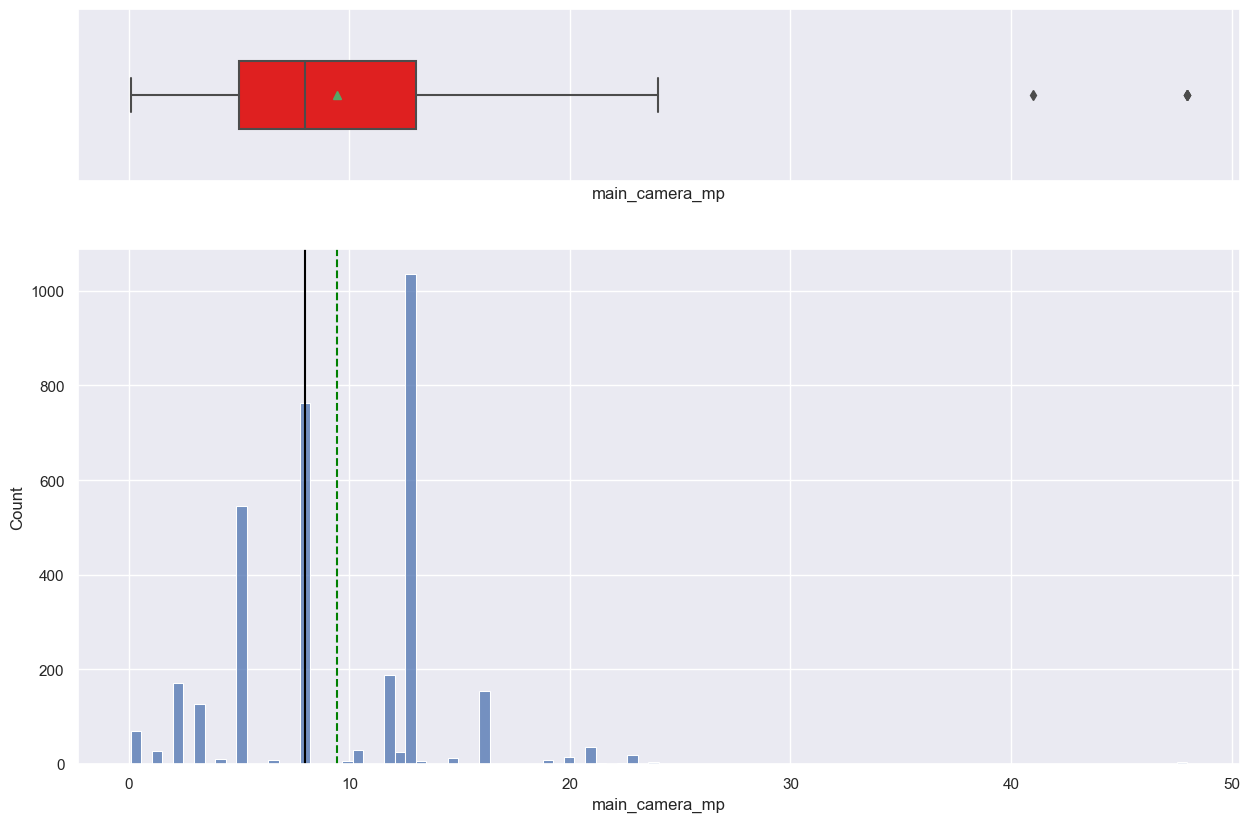

In [200]:
histogram_boxplot(df, "main_camera_mp", bins=100)

- Few devices offer rear cameras with more than 20MP resolution.

**selfie_camera_mp**

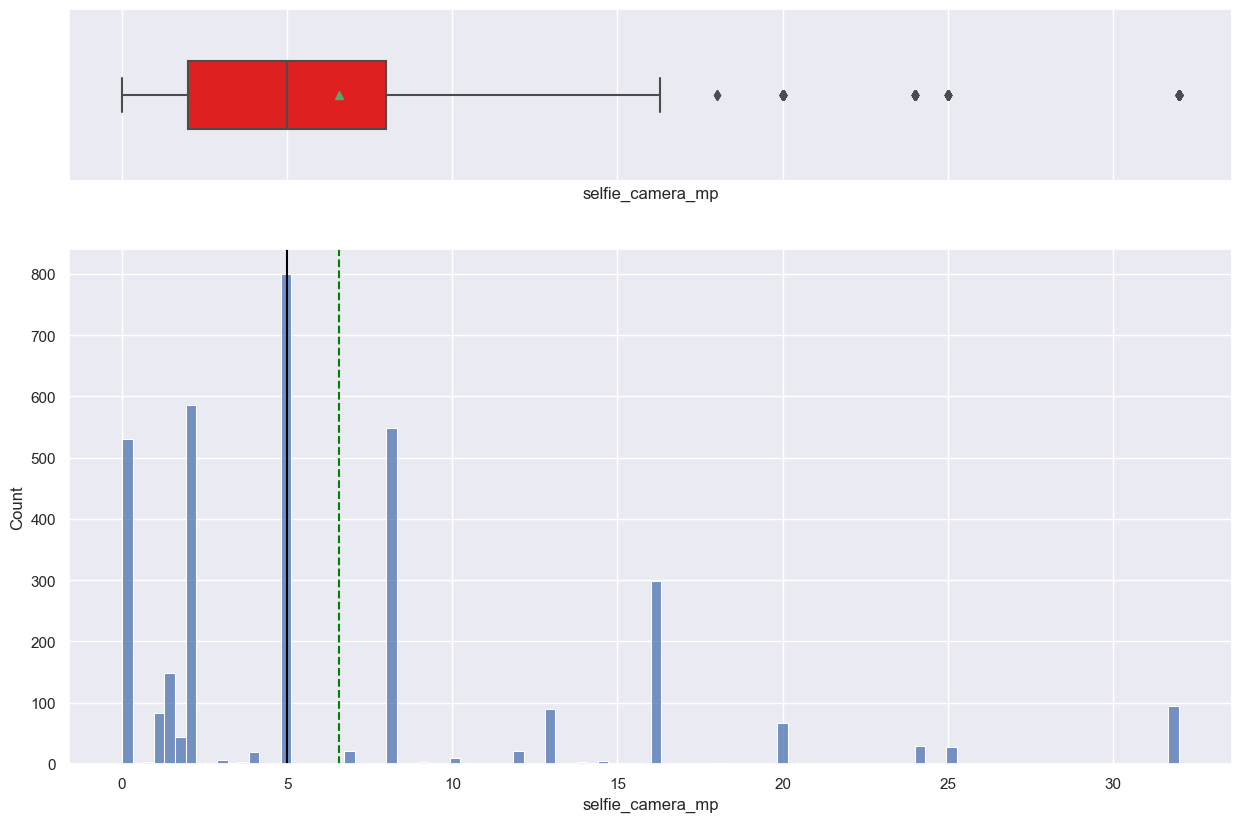

In [201]:
histogram_boxplot(df, "selfie_camera_mp", bins=100)

- Some devices do not provide a front camera (most likely the feature phones), while few devices offer ones with more than 16MP resolution.

**int_memory**

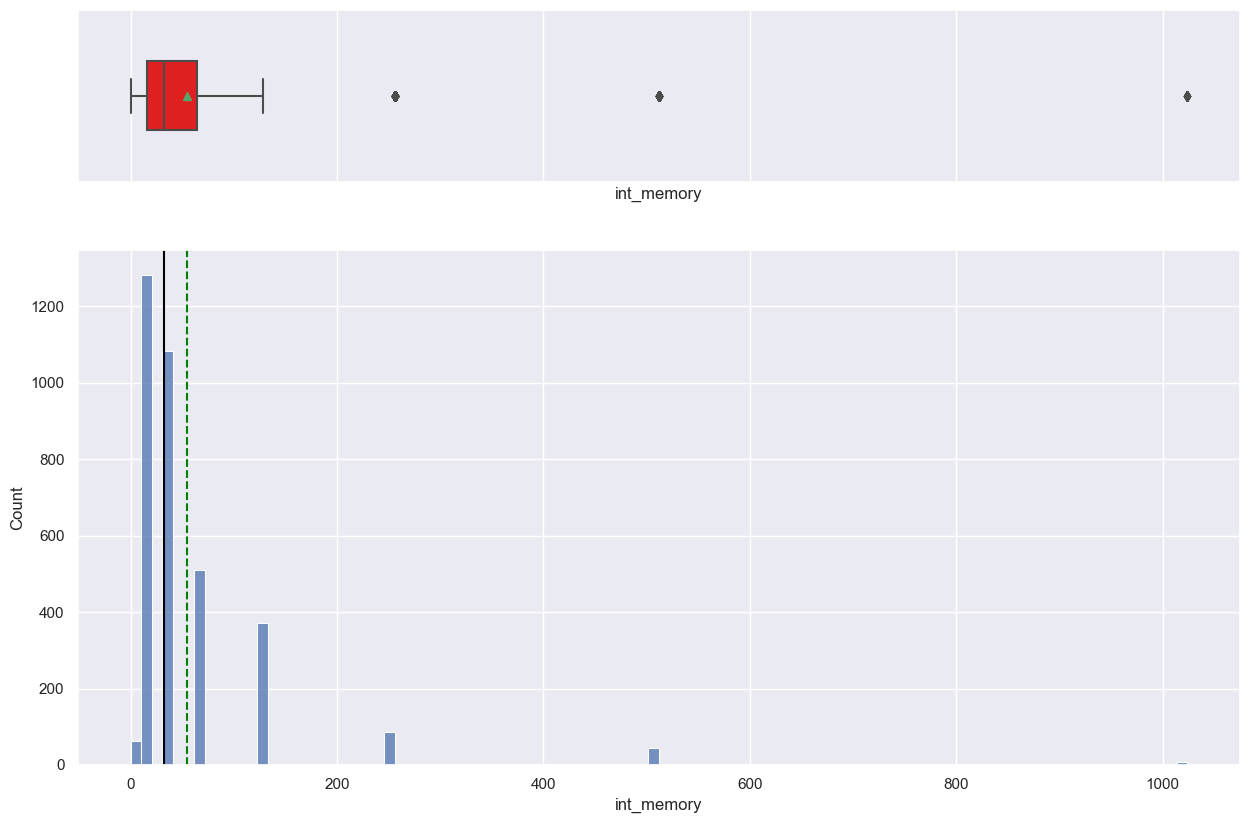

In [202]:
histogram_boxplot(df, "int_memory", bins=100)

- Few devices offer more than 256GB internal memory.

**Ram**

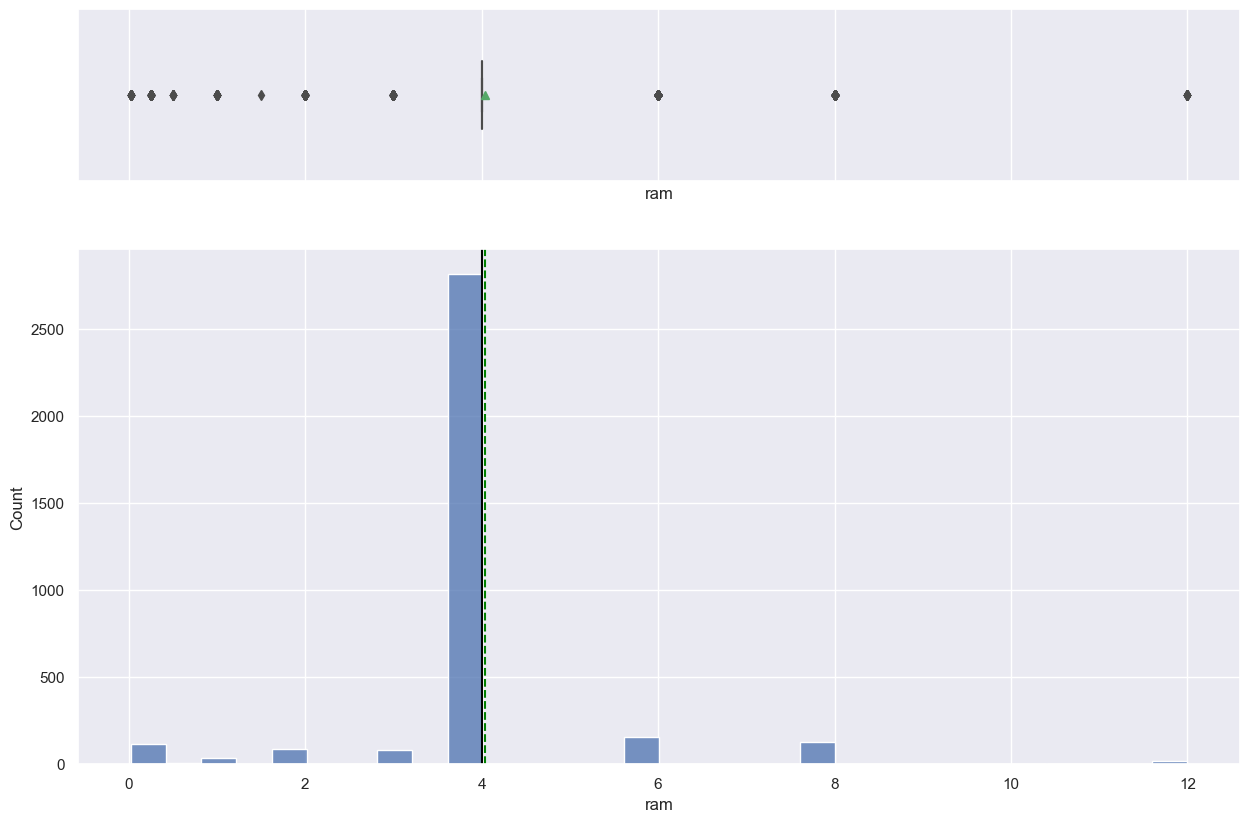

In [203]:
histogram_boxplot(df, "ram", bins=30)

- Most of the devices offer 4GB RAM and very few offer greater than 8GB RAM.

**Weight**

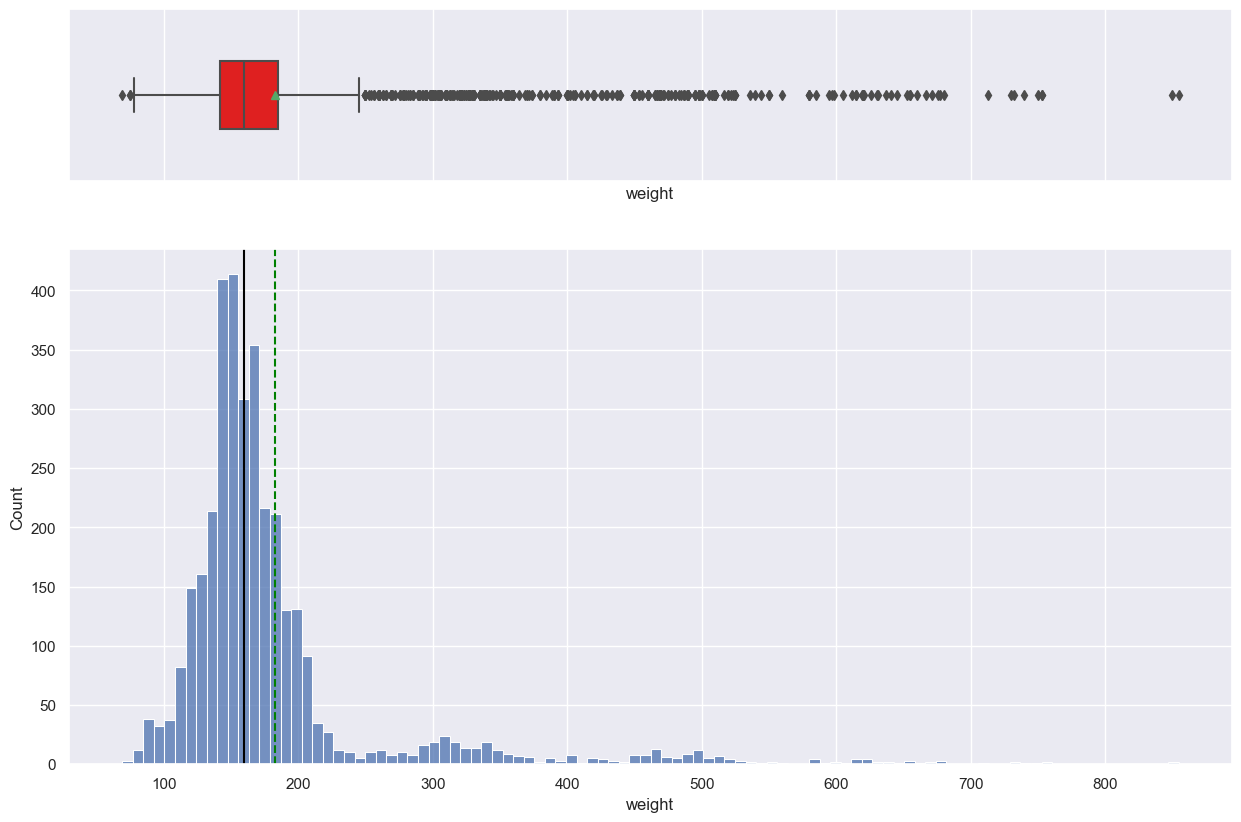

In [204]:
histogram_boxplot(df, "weight", bins=100)

- The distribution of weight is right-skewed and has many upper outliers.

**Battery**

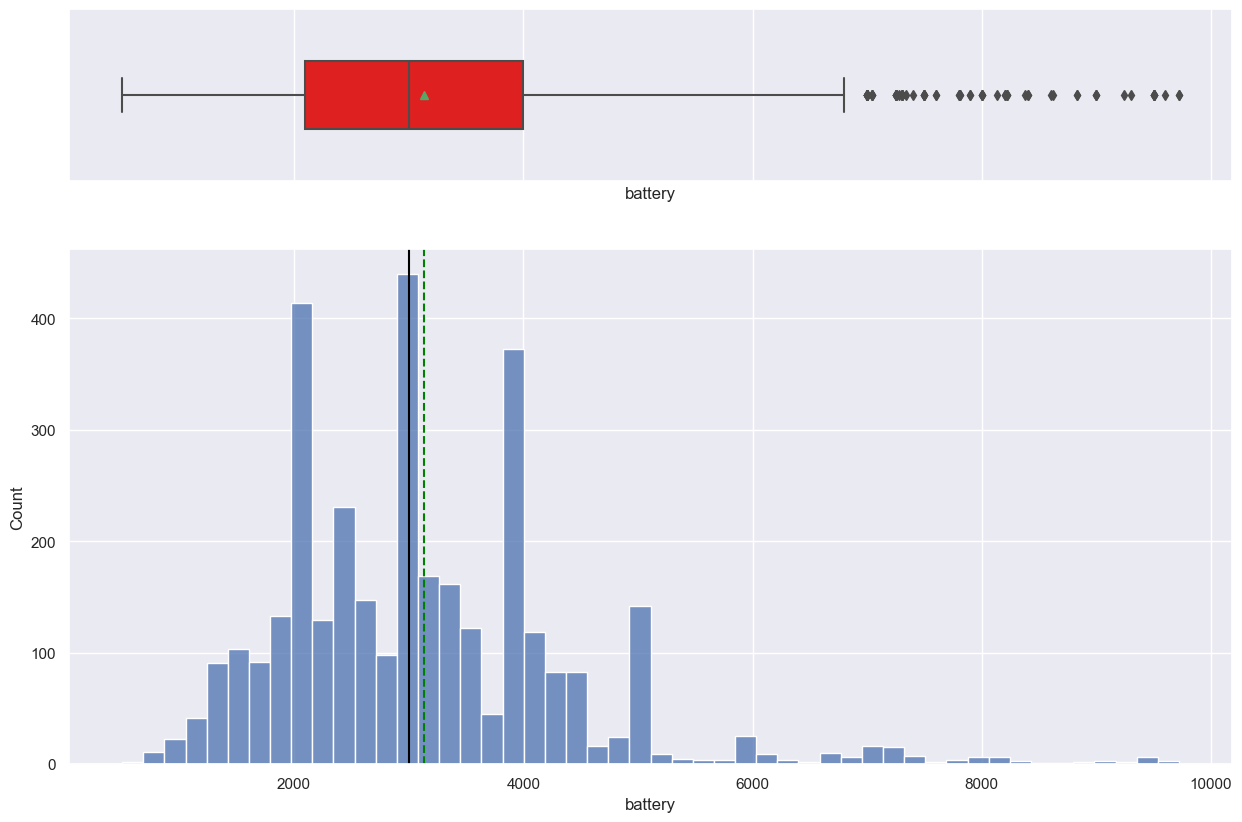

In [205]:
histogram_boxplot(df, "battery", bins=50)

- The distribution of energy capacity of battery is close to normally distributed with a few upper outliers.

**days_used**

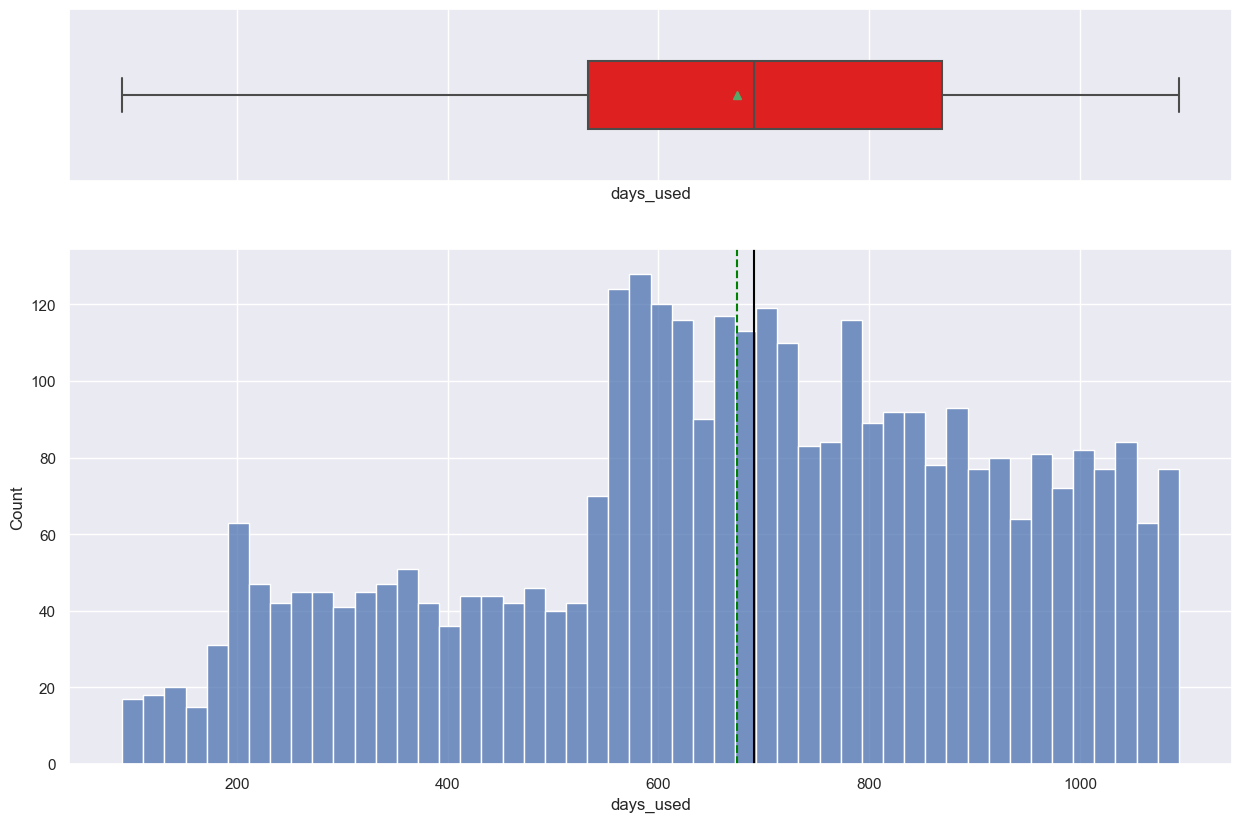

In [206]:
histogram_boxplot(df, "days_used")

- Around 50% of the devices in the data have been used for more than 700 days.

**brand_name**

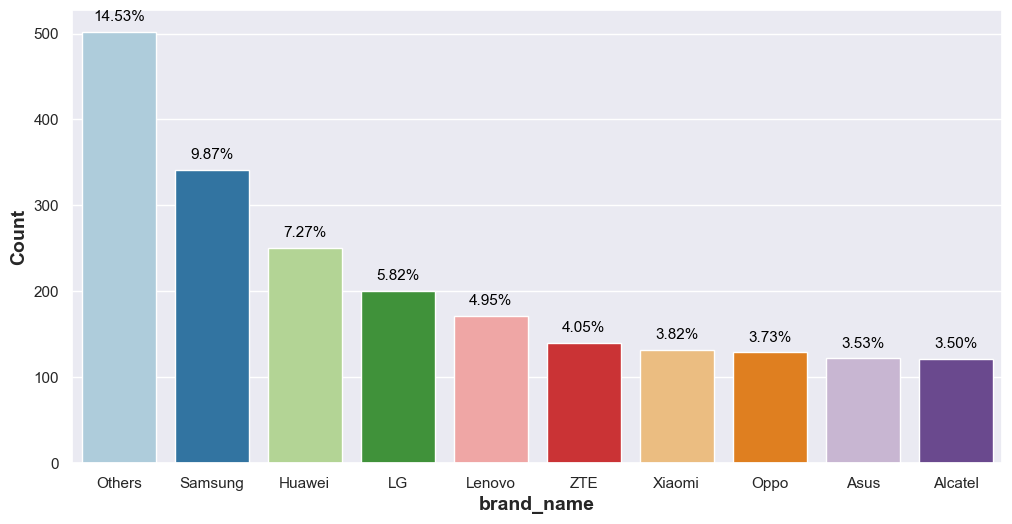

In [207]:
labeled_barplot(df, "brand_name", perc=True, n=10)

**Observations**

- Samsung has the most number of devices in the data, followed by Huawei and LG.
- 14.5% of the devices in the data are from brands other than the listed ones.

**os**

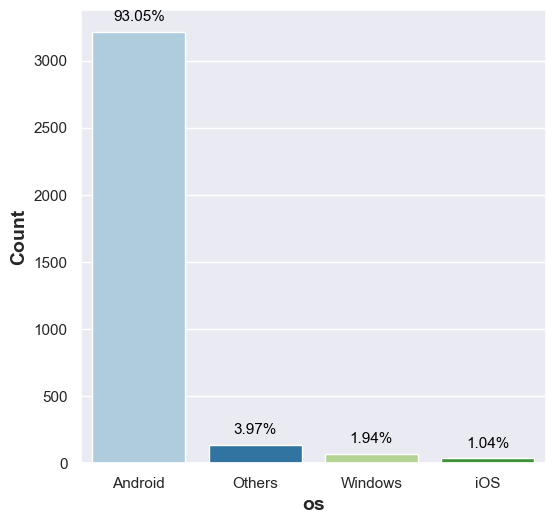

In [208]:
labeled_barplot(df, "os", perc=True)

- Android devices dominate ~93% of the used device market.

**4G**

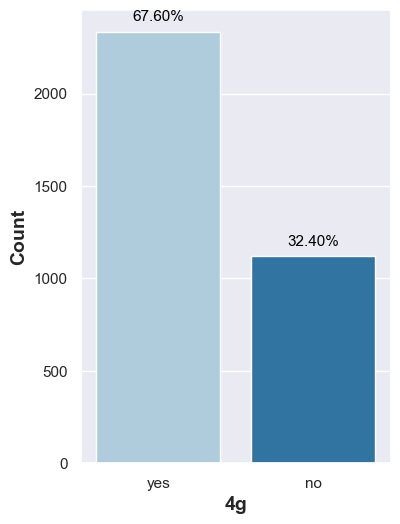

In [209]:
labeled_barplot(df, "4g", perc=True)

- Nearly two-thirds of the devices in this data have 4G available.

**5G**

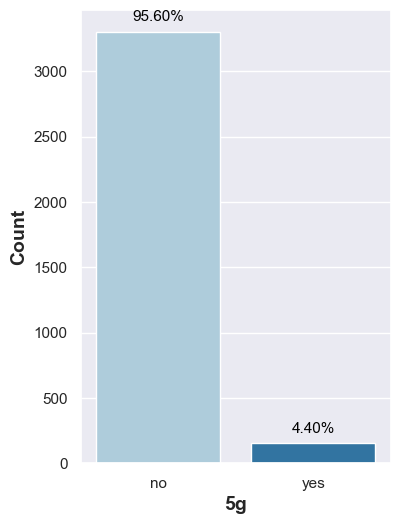

In [210]:
labeled_barplot(df, "5g", perc=True)

- Only a handful of devices in this data provide 5G network.

**release_year**

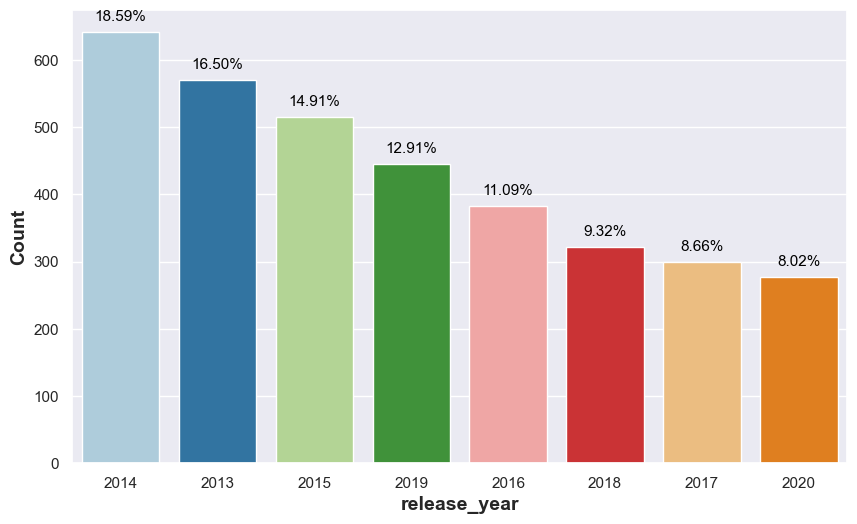

In [211]:
labeled_barplot(df, "release_year", perc=True)

- Around 50% of the devices in the data were originally released in 2015 or before.

### Bivariate Analysis

**Correlation Check**

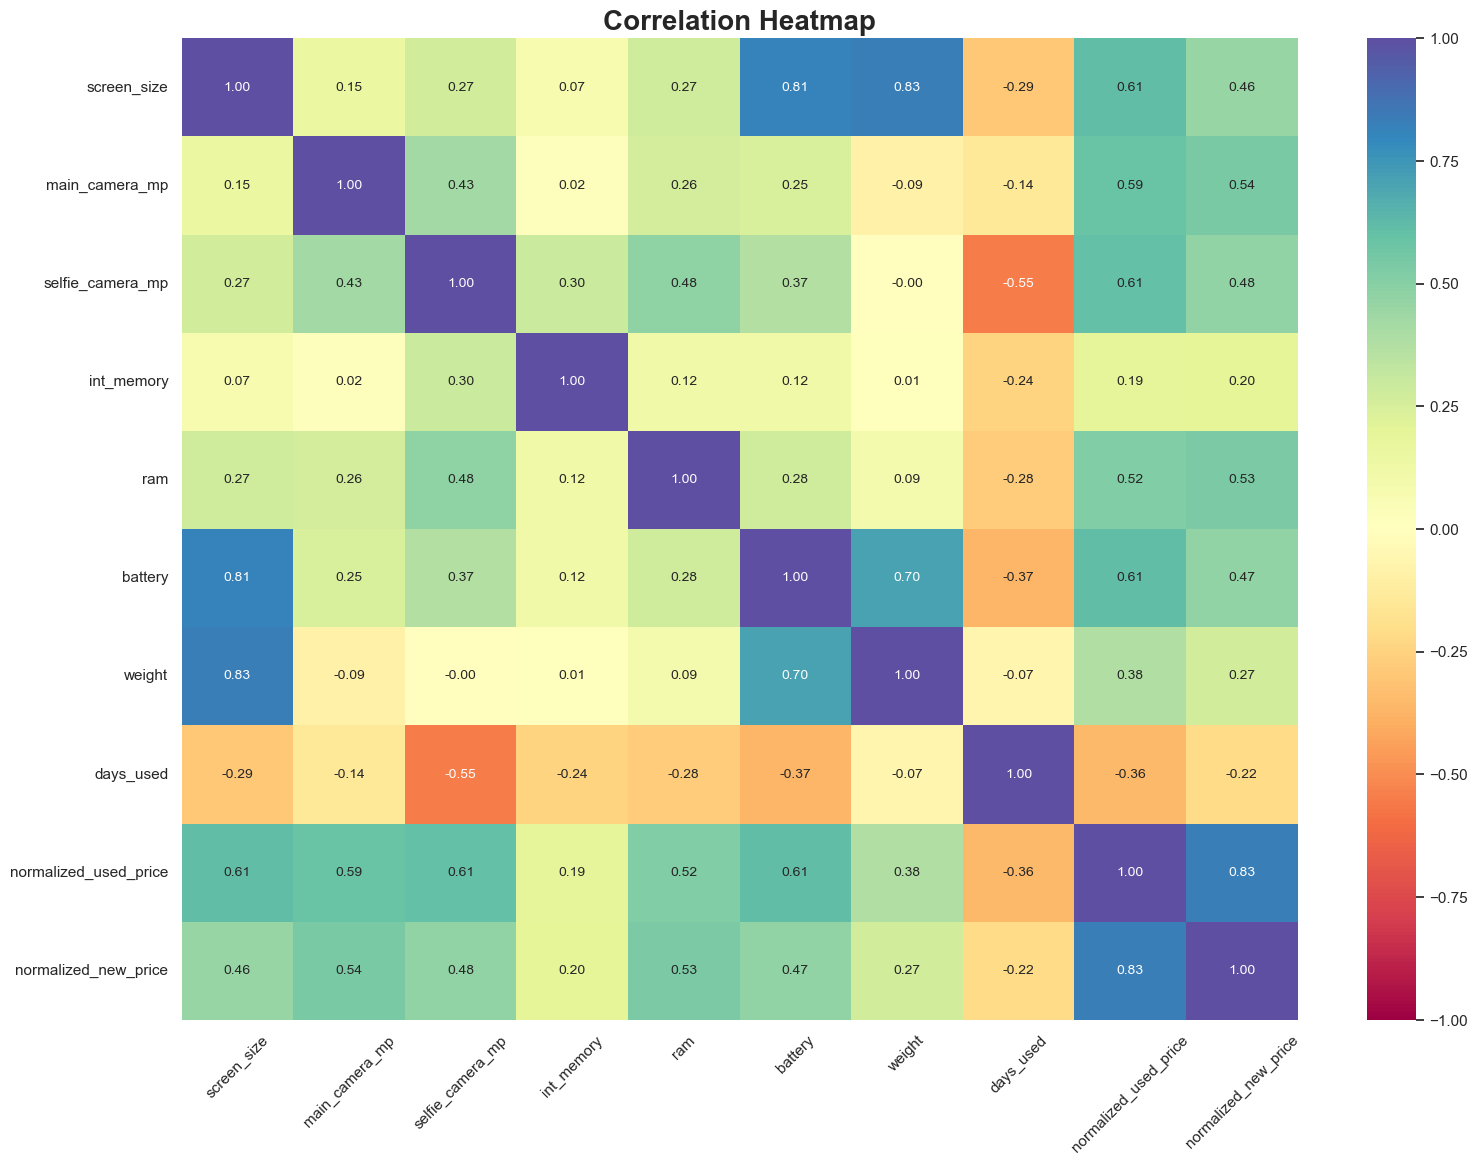

In [212]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(18, 13), dpi=100)

sns.heatmap(
    df[cols_list].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral"
)

plt.title("Correlation Heatmap", fontsize=20, weight='bold')
plt.xticks(rotation=45)

plt.show()

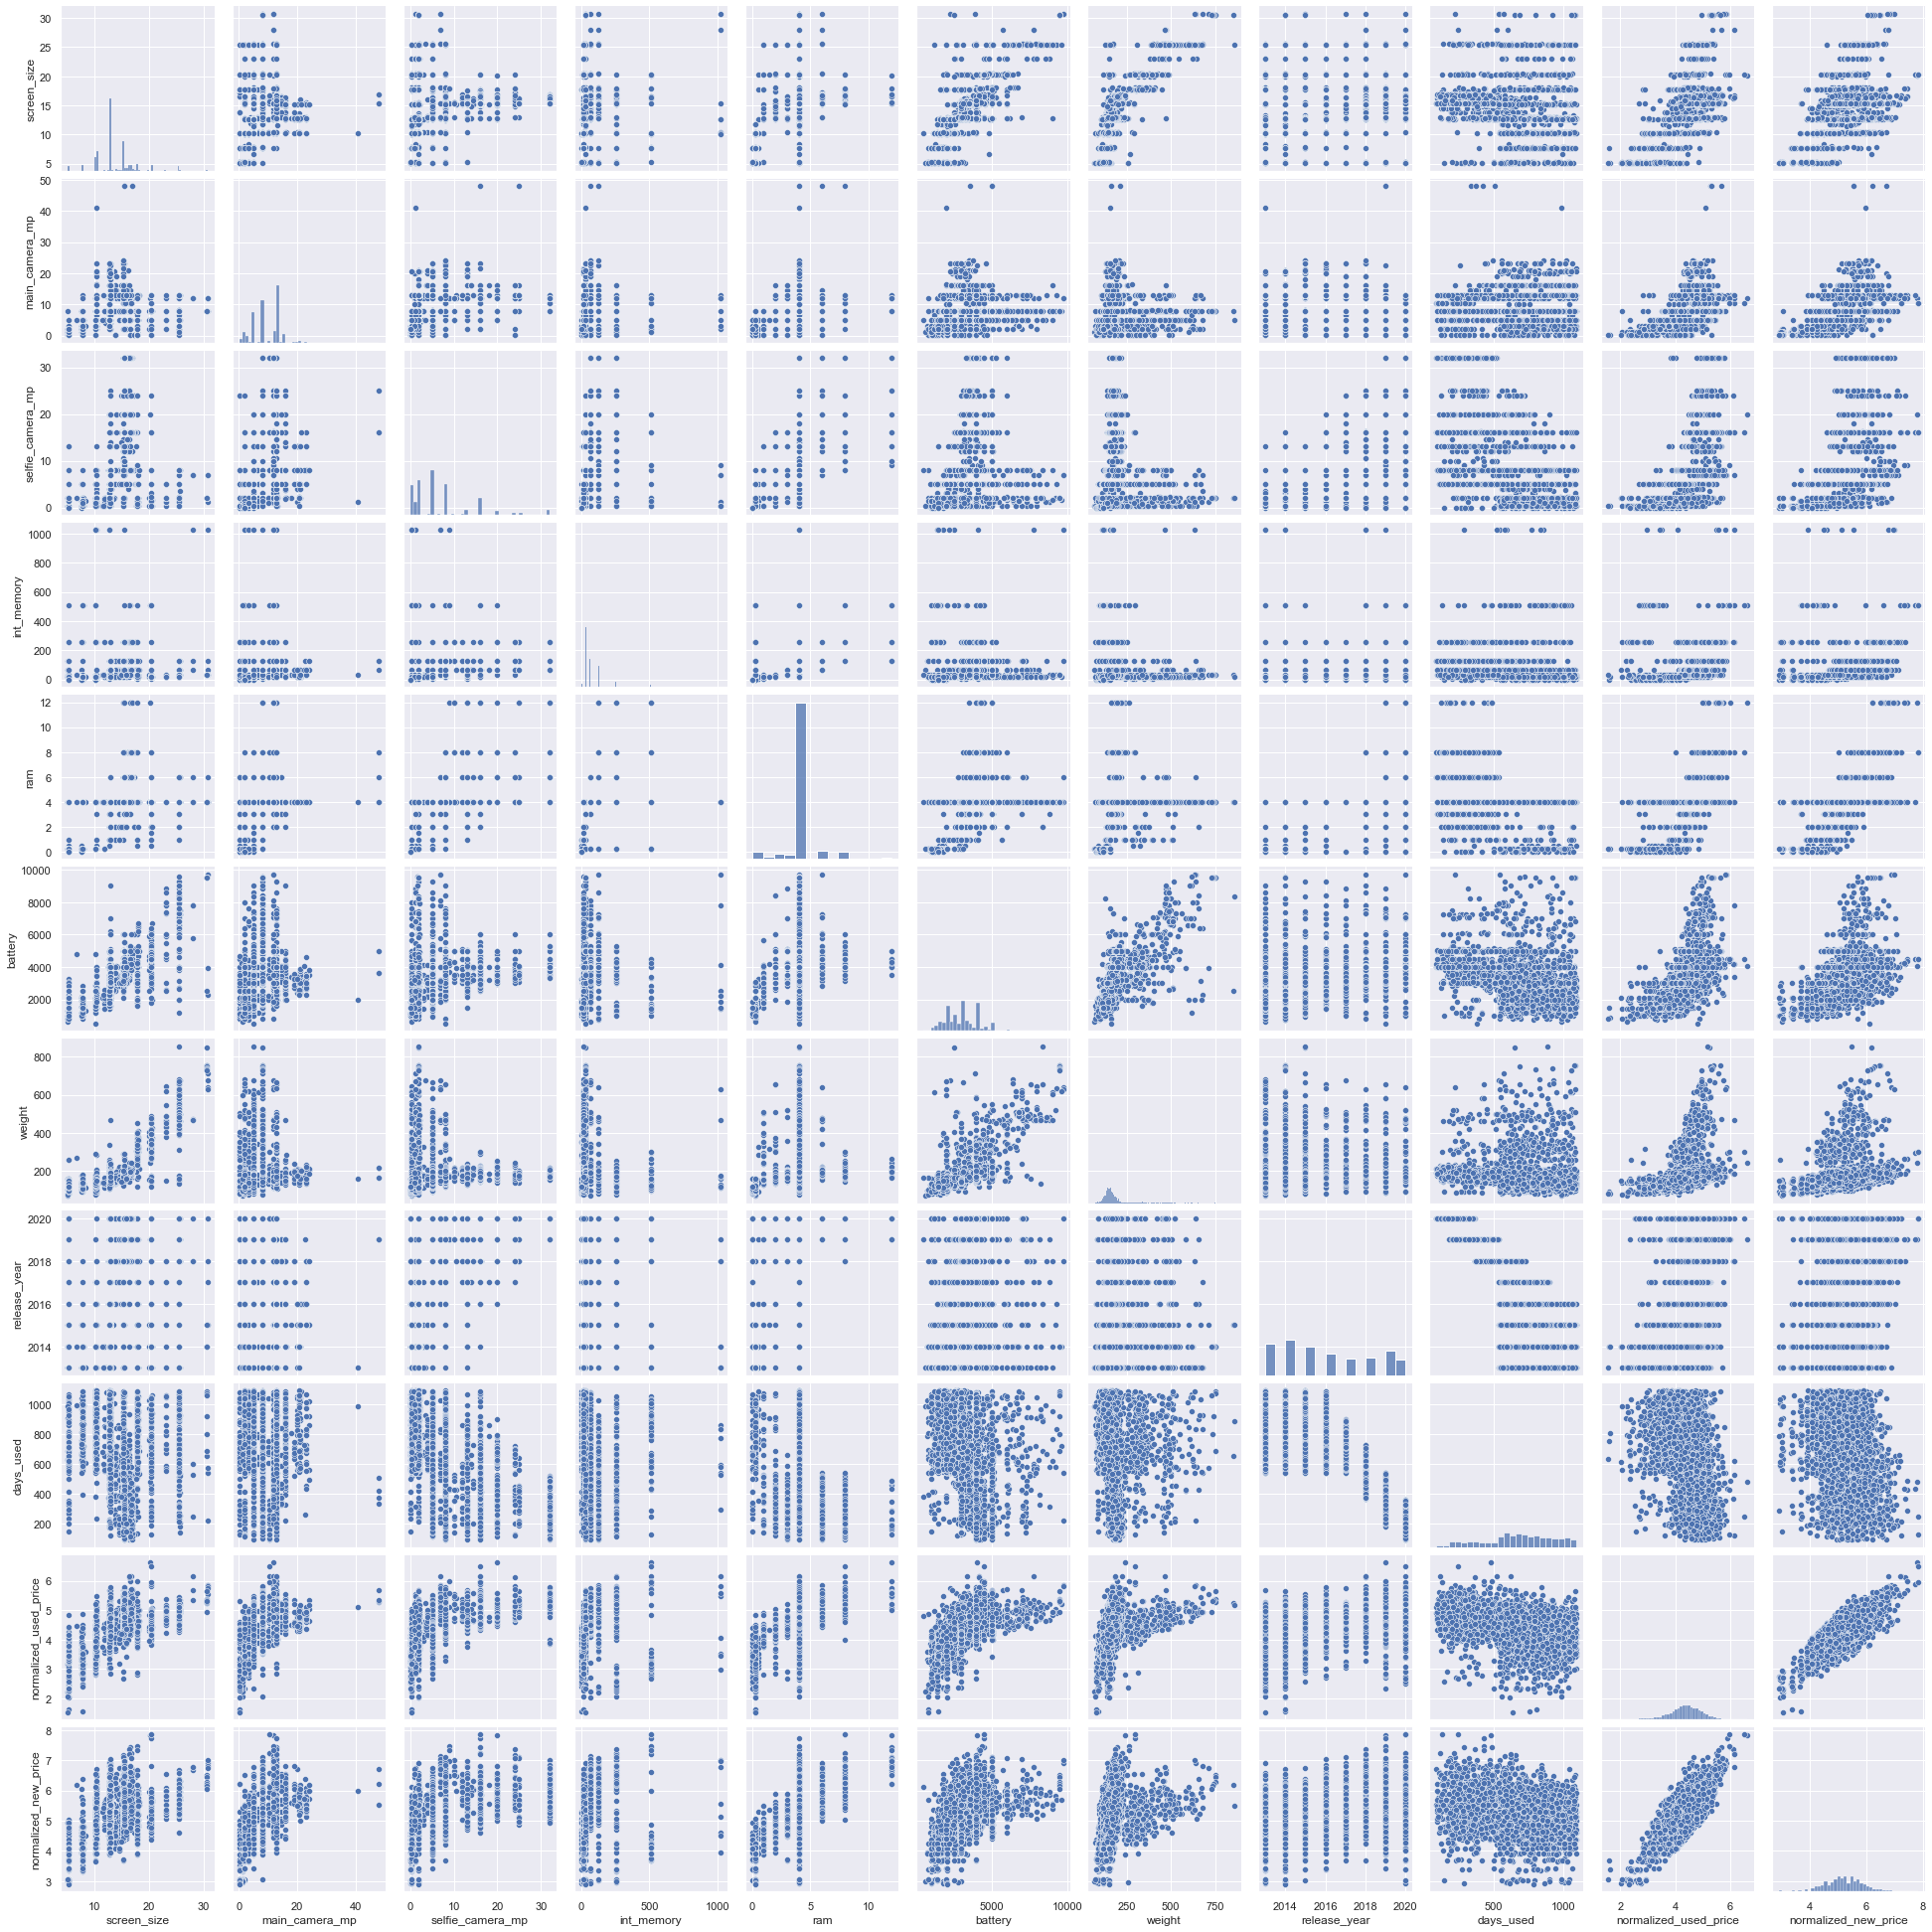

In [213]:
# correlation metrix
sns.pairplot(df, diag_kind='auto')

**Observations**

- The normalized used device price is highly correlated with the normalized price of a new device model.
    - This makes sense as the price of a new model is likely to affect the used device price.
- The normalized used device price is also moderately correlated with the resolution of the cameras provided, the size of the screen, and the battery capacity.
- Weight, screen size, and battery capacity of a device show a good amount of correlation.
    - This makes sense as larger battery capacity requires bigger space, thereby increasing screen size and weight.
- The number of days a device is used is negatively correlated with the resolution of its front camera.
    - This makes sense as older devices did not offer as powerful front cameras as the recent ones.

**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

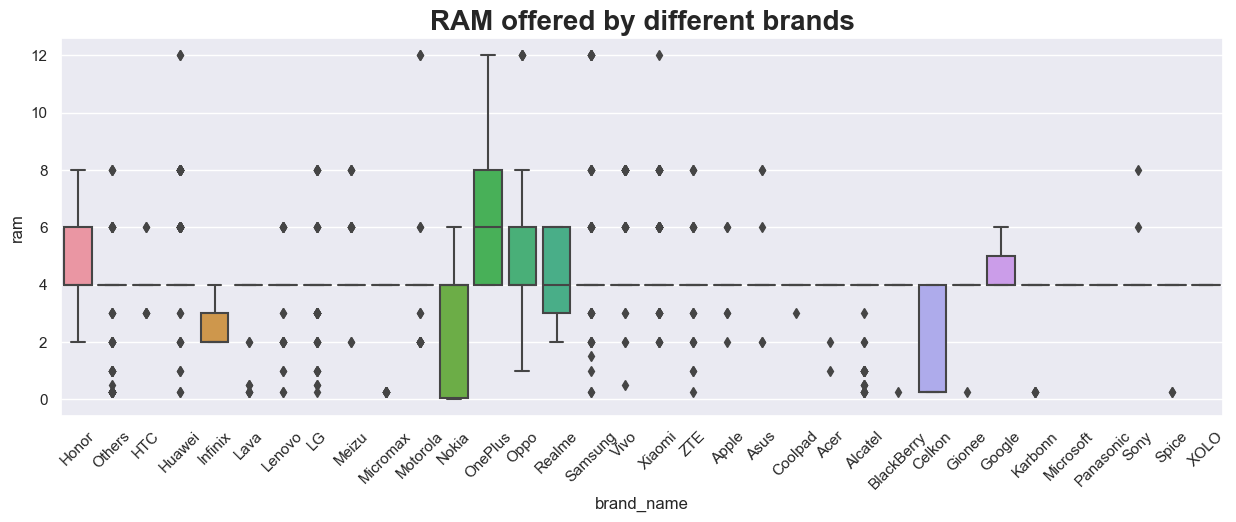

In [214]:
plt.figure(figsize=(15, 5), dpi=100)

sns.boxplot(data=df, x="brand_name", y="ram")

plt.title("RAM offered by different brands", fontsize=20, weight='bold')
plt.xticks(rotation=45)

plt.show()

**Observations**

- 50% of the devices offered by most of the companies have 4GB of RAM.
- 50% of OnePlus devices have 6GB or more RAM, indicating that OnePlus devices offer more RAM in general.

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [215]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

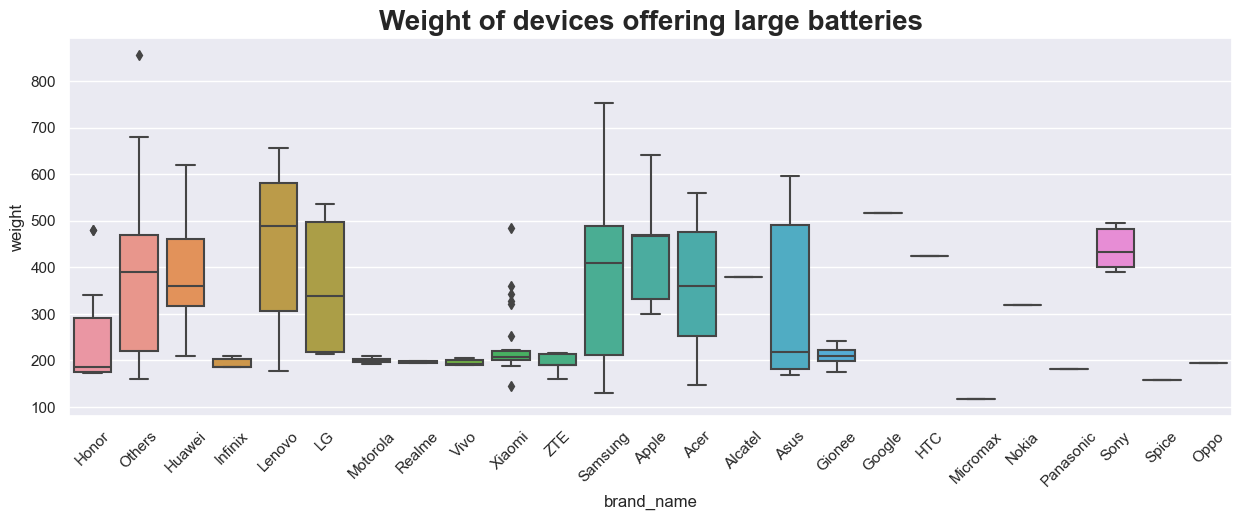

In [216]:
plt.figure(figsize=(15, 5), dpi=100)

sns.boxplot(data=df_large_battery, x="brand_name", y="weight")

plt.title("Weight of devices offering large batteries", fontsize=20, weight='bold')
plt.xticks(rotation=45)

plt.show()

**Observations**

- A lot of brands offer devices which are not very heavy but have a large battery capacity.
- Some devices offered by brands like Vivo, Realme, Motorola, etc. weigh just about 200g but offer great batteries.
- Some devices offered by brands like Huawei, Apple, Sony, etc. offer great batteries but are heavier.

**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [217]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

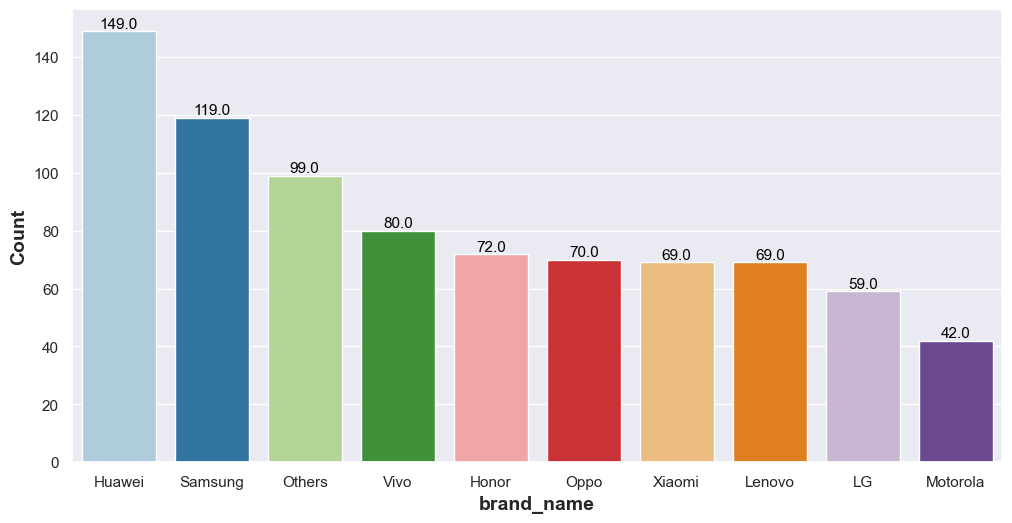

In [218]:
labeled_barplot(df_large_screen, "brand_name", n=10)

**Observations**

- Huawei and Samsung offer a lot of devices suitable for customers buying phones and tablets for entertainment purposes.

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [219]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

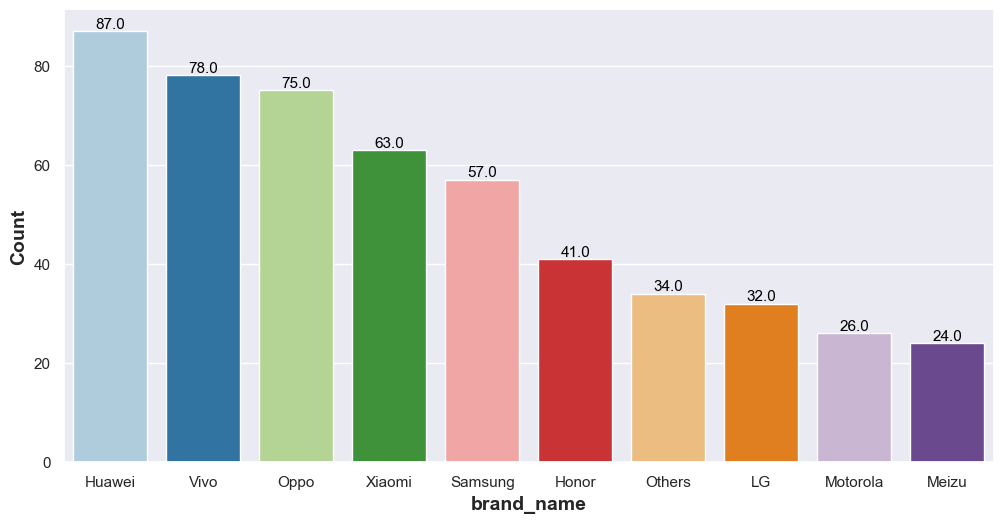

In [220]:
labeled_barplot(df_selfie_camera, "brand_name", n=10)

**Observations**

- Huawei is the go-to brand for this customer segment as they offer many devices with powerful front cameras.
- Oppo and Vivo also offer a lot of devices suitable for this customer segment.

**Let's do a similar analysis for rear cameras.**

- Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [221]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

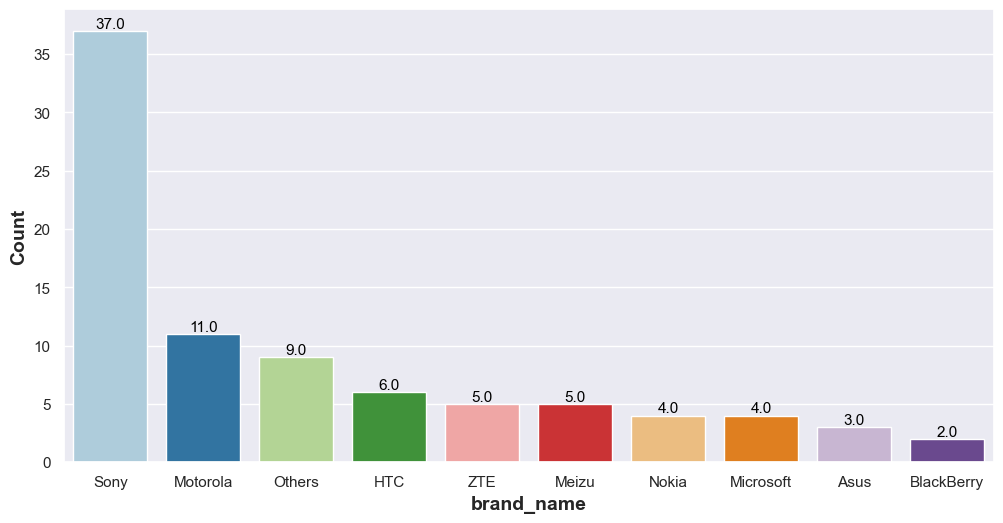

In [222]:
labeled_barplot(df_main_camera, "brand_name", n=10)

**Observations**

- Sony is the go-to brand for great rear cameras as they offer many devices under this criteria.

**Let's see how the price of used devices varies across the years.**

<ipython-input-223-f8cab2463054>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df, x="release_year", y="normalized_used_price", ci=False)


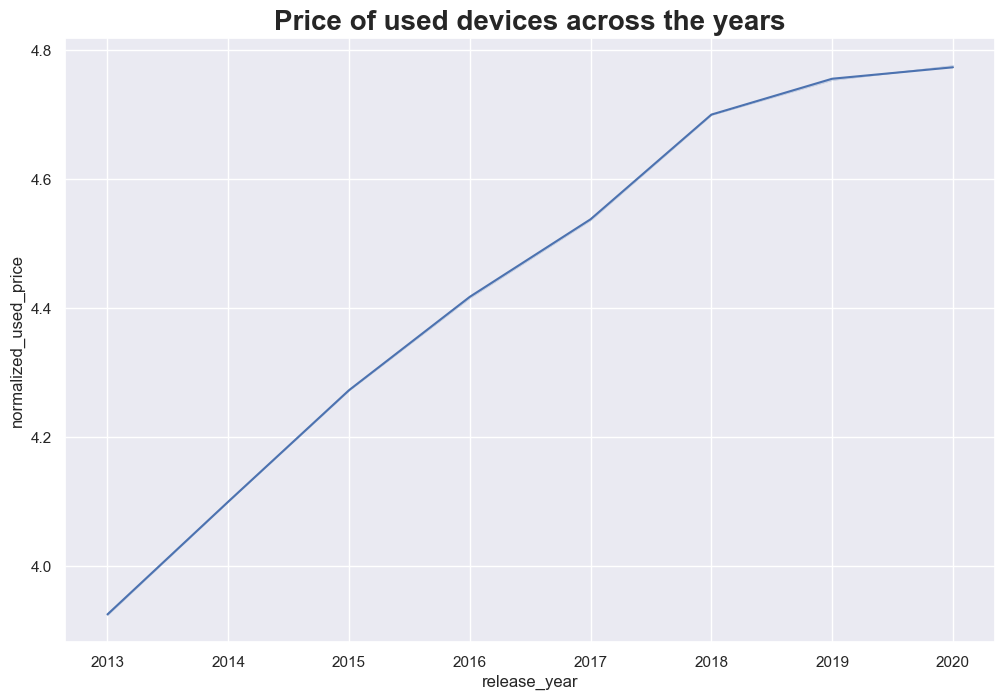

In [223]:
plt.figure(figsize=(12, 8), dpi=100)

sns.lineplot(data=df, x="release_year", y="normalized_used_price", ci=False)

plt.title("Price of used devices across the years", fontsize=20, weight='bold')

plt.show()

- The price of used devices has increased over the years.

**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

<Figure size 1000x400 with 0 Axes>

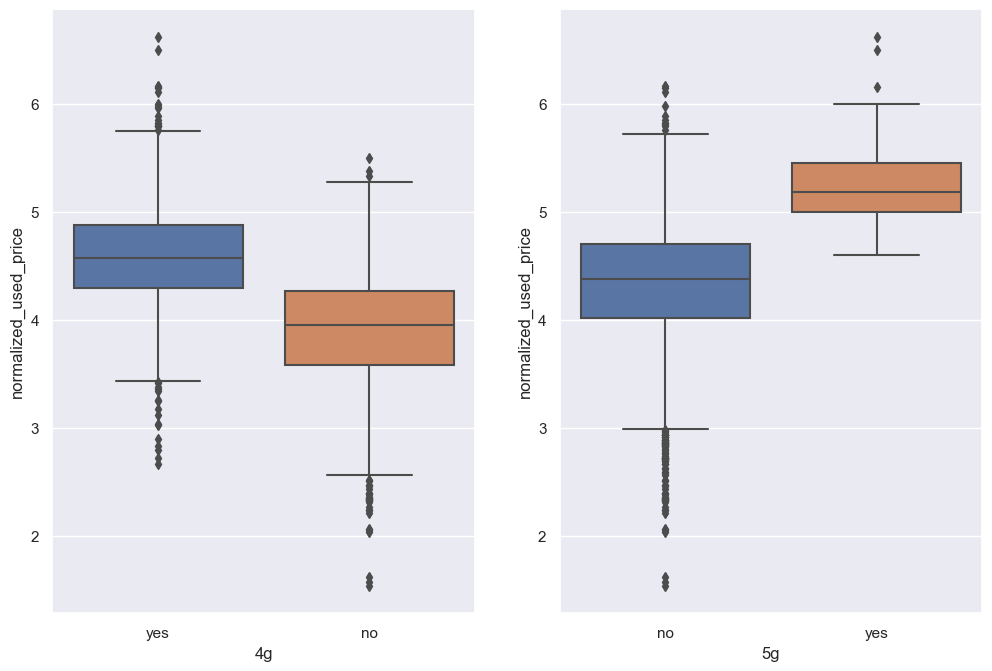

In [224]:
plt.figure(figsize=(10, 4), dpi=100)

# set a title

fig, ax = plt.subplots(1, 2, figsize=(12, 8), dpi=100)

sns.boxplot(data=df, x="4g", y="normalized_used_price", ax=ax[0])

sns.boxplot(data=df, x="5g", y="normalized_used_price", ax=ax[1])

plt.show()

**Observations**

- As expected, used devices offering 4G and 5G networks are generally priced higher than the ones without 4G and 5G networks.

## Data Preprocessing

### Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [225]:
# let's create a copy of the data
df1 = df.copy()

In [226]:
# checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [227]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["release_year", "brand_name"])[col].transform("median")
    )

# checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [228]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["brand_name"])[col].transform("median")
    )

# checking for missing values
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

- We will fill the remaining missing values in the `main_camera_mp` column by the column median.

In [229]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

# checking for missing values
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

- All missing values have been imputed.

### Feature Engineering

- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [230]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

- 50% of the used devices in the data were originally released five and half years ago.

### Outlier Check

- Let's check for outliers in the data.

In [231]:
df1

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,13.0,8.0,64.0,6.0,5000.0,190.0,232,4.492337,6.483872,2
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,541,5.037732,6.251538,3
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,201,4.357350,4.528829,1
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,149,4.349762,4.624188,1


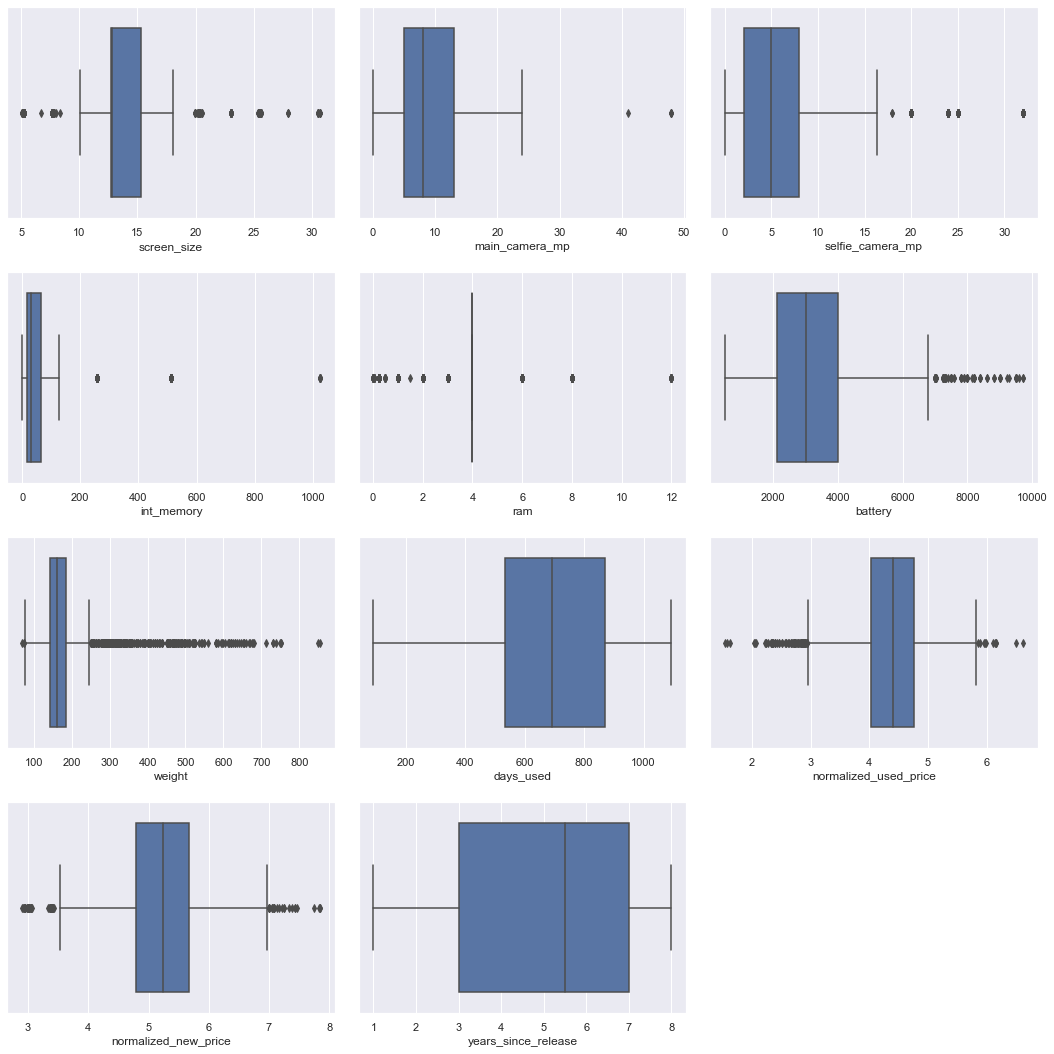

In [232]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

**Observations**

- There are quite a few outliers in the data
- However, we will not treat them as they are proper values

In [233]:
# let's check the statistical summary of the data
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.617597,4.749438,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,6.555067,6.96844,0.0,2.0,5.0,8.0,32.0
int_memory,3454.0,NaN,NaN,NaN,54.528474,84.934991,0.01,16.0,32.0,64.0,1024.0
ram,3454.0,NaN,NaN,NaN,4.03262,1.368598,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3132.577446,1298.884193,500.0,2100.0,3000.0,4000.0,9720.0


### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [234]:
# defining the dependent and independent variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

X.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1


In [235]:
y.head()

0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: normalized_used_price, dtype: float64

In [236]:
# let's add the intercept to data
X = sm.add_constant(X)

In [237]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [238]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [239]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [240]:
olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Fri, 25 Aug 2023   Prob (F-statistic):               0.00
Time:                           22:00:42   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations**

- Both the R-squared and Adjusted R squared of our model are greater than 0.8, indicating that it can explain more than 80% of the variance in the normalized price of used phones.

- This is a clear indication that we have been able to create a very good model which is not underfitting the data.

- To be able to make statistical inferences from our model, we will have to test that the linear regression assumptions are followed.

### Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for $RMSE$, $MAE$, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [241]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [242]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [243]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test)
olsmodel1_test_perf

Test Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


**Observations**

- RMSE and MAE of train and test data are very close, which indicates that our model is not overfitting the train data.
- MAE indicates that our current model is able to predict normalized used phone prices within a mean error of ~0.24 euros on test data.
- The RMSE values are higher than the MAE values as the squares of residuals penalizes the model more for larger errors in prediction.
- MAPE of ~4.5 on the test data indicates that the model can predict within ~4.5% of the normalized used phone price.

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [244]:
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [245]:
checking_vif(x_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


**Observations**

- Some of the numerical variables show high multicollinearity
- We will ignore the VIF for the constant and the dummy variables

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [246]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [247]:
col_list = [
    "screen_size",
    "weight",
]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


In [248]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.673906
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,years_since_release,4.730315


- None of the numerical variables have a VIF > 5 now.

### Dealing with high p-value variables

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

**Note**: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [249]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [250]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [251]:
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Fri, 25 Aug 2023   Prob (F-statistic):               0.00
Time:                           22:00:48   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [252]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train)
olsmodel2_train_perf

Training Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [253]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test)
olsmodel2_test_perf

Test Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


**Observations**

- Dropping the high p-value predictor variables has not adversely affected the model performance.
- This shows that these variables do not significantly impact the target variables.

**Now we'll check the rest of the assumptions on *olsmodel2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [254]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


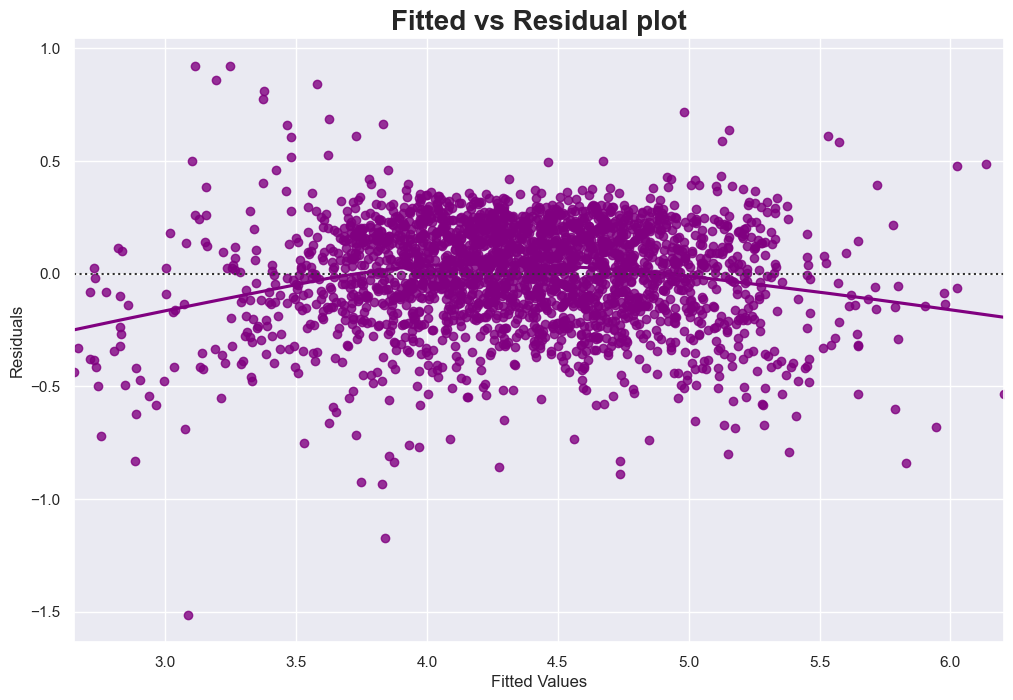

In [255]:
# let's plot the fitted values vs residuals
plt.figure(figsize=(12, 8), dpi=100)

sns.residplot(
    data=df_pred,
    x="Fitted Values",
    y="Residuals",
    color="purple",
    lowess=True
)

plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot", fontsize=20, weight='bold')
plt.show()

**Observations**

- We see no pattern in the plot above.
- Hence, the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

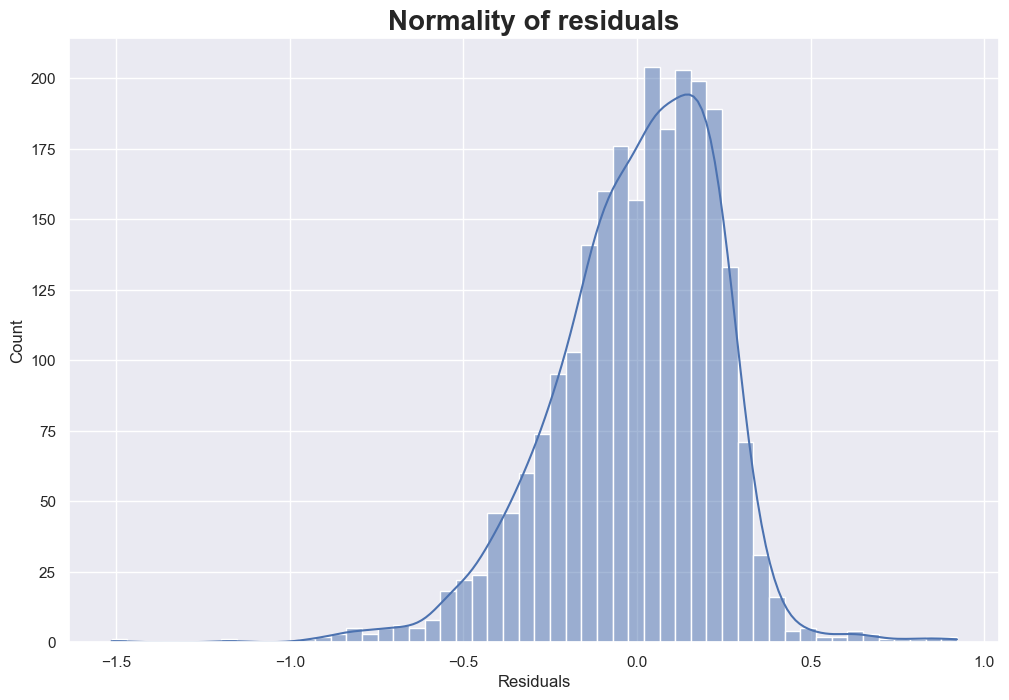

In [256]:
# let's plot the distribution of residuals
plt.figure(figsize=(12, 8), dpi=100)

sns.histplot(
    data=df_pred,
    x="Residuals",
    kde=True
)

plt.title("Normality of residuals", fontsize=20, weight='bold')
plt.show()

**Observations**

- The histogram of residuals does have a slight bell shape.
- Let's check the Q-Q plot.

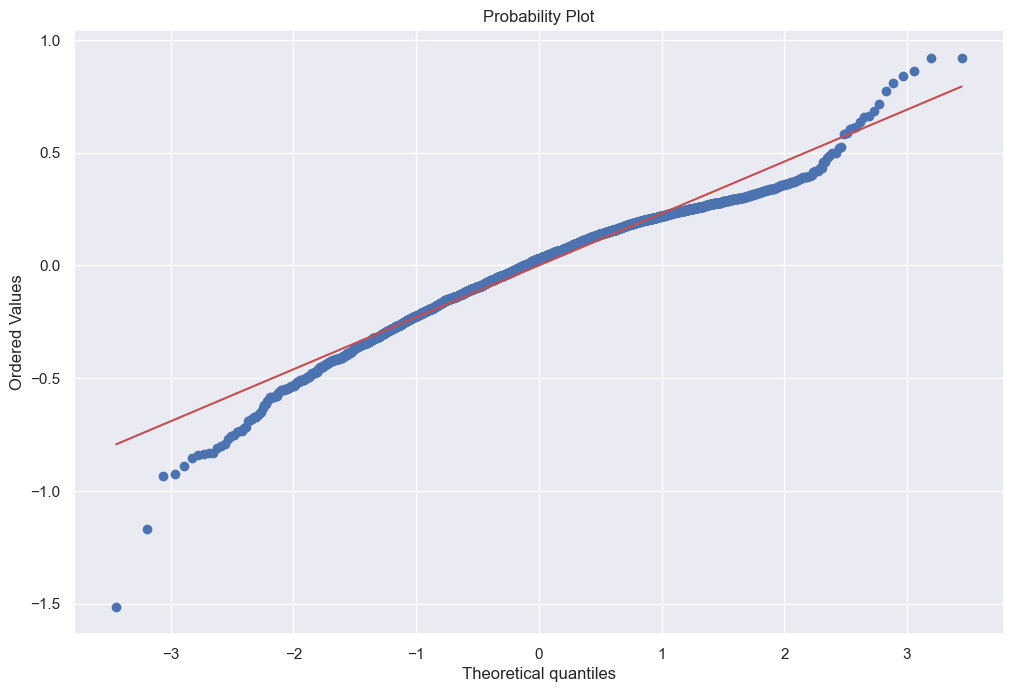

In [257]:
import pylab
import scipy.stats as stats

plt.figure(figsize=(12, 8), dpi=100)

stats.probplot(df_pred["Residuals"],
               dist="norm",
               plot=pylab)

plt.show()

**Observations**

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [258]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9676975607872009, pvalue=6.99743730520301e-23)

**Observations**

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal. However, as an approximation, we can accept this distribution as close to being normal.
- So, the assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY

- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [259]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0087504199106752), ('p-value', 0.44019706506678935)]

**Observations**

- Since p-value > 0.05, the residuals are homoscedastic.
- So, the assumption is satisfied.

**All the assumptions of linear regression are satisfied. Let's rebuild our final model, check its performance, and draw inferences from it.**

## Final Model

In [260]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [261]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Fri, 25 Aug 2023   Prob (F-statistic):               0.00
Time:                           22:00:48   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [264]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [265]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


## Actionable Insights and Recommendations

1. The model explains ~84% of the variation in the data and can predict the normalized used device price within ~4.6%, so it is good for predictive purposes.


2. The most significant predictors of the normalized used device price are the normalized price of a new device of the same model, the weight of the devices screen, the resolution of the rear and front cameras, the years since the original release of the device, the amount of RAM, the availability of 4G and 5G network.

    - A unit increase in the normalized new model price will result in a 0.4415 unit increase in the normalized used device price, all other variables held constant
    - A unit increase in the amount of RAM will result in a 0.0207 unit increase in the normalized used device price, all other variables held constant
    - A unit increase in the years since the original release of the device will result in a 0.0292 unit decrease in the normalized used device price, all other variables held constant
    - A unit increase in the resolution of the front camera will result in a 0.0138 unit increase in the normalized used device price, all other variables held constant
    - A unit increase in the resolution of the rear camera will result in a 0.0210 unit increase in the normalized used device price, all other variables held constant
    - The normalized used device price for devices with 4G connectivity will be 0.0502 units more than those without 4G connectivity


3. ReCell should look to attract people who want to sell used phones and tablets which were originally released in recent years and have good front and rear camera resolutions.


4. Devices with more RAM and 4G connectivity are also good candidates for reselling to certain customer segments.


5. They should also try to gather and put up phones having a high price for new models to try and increase revenue.


6. Additional data regarding customer demographics (age, gender, income, etc.) can be collected and analyzed to gain better insights into the preferences of customers across different price segments.


7. ReCell can also look to sell other used gadgets, like smart watches, which might attract certain segments of customers.